## SARIMAX Modeling and Forecasting

In [1]:
import pandas as pd
from fredapi import Fred
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Initialize the Fred object with your API key
fred = Fred(api_key='70a5960bdec357f09a4d4922e4c749d7')

## SARIMAX

`SARIMAX` modeling requires exogenous variables that contribute to the change in the endogenous variable. This requires extensive subject matter knowledge, therefore, we restricted ourselves to the forecasting of USD/INR only.

### Exogenous Variables

We forecast foreign exchange rates using SARIMAX with inflation, interest rates, and trade-transactions as exogenous variables. However, these are generic and therefore, we used indicators for each of these.

`Inflation`: For inflation, we used Consumer Price Index (CPI) as the indicator. We obtained the most significant CPI for US and India for modeling. In US, the total Urban consumers is considered to have greatest weightage. In India, All items category of CPI has the greatest weightage.

`Interest Rates`: For interest rates, we used the Federal Funds Rate for US and 10-Year Long-Term Government Bond Yields for India as indicators. 

`Current Account Balance`: The third indicator we used was the Balance of Payments in the current account as a percent of GDP for both the countries

We gathered all the datasets from the FRED using their Python API. Here are the specific FRED series codes for each category:

<b>Inflation</b>:

Consumer Price Index for All Urban Consumers (US): `CPIAUCNS`

Consumer Price Index for All Items (IND): `INDCPIALLMINMEI`

<b>Interest Rates</b>:

Effective Federal Funds Rate (US): `FEDFUNDS`

10-Year  Long-Term Government Bond Yields (IND): `INDIRLTLT01STM`

<b>Trade Transactions</b>:

Balance of Payment - Current Account (US) as a % of GDP: `USAB6BLTT02STSAQ`

Balance of Payment - Current Account (IND) as a % of GDP: `INDB6BLTT02STSAQ`

#### Consumer Price Index: All urban Consumers - indicator of Inflation

In [3]:
cpi_us_monthly = fred.get_series('CPIAUCSL')
cpi_us_monthly.to_csv('data/cpi_us.csv')
cpi_us_df = pd.DataFrame({'CPI_US':cpi_us_monthly})
cpi_us_df = cpi_us_df.loc['2014-01-01':'2023-11-01']
cpi_us_df

,CPI_US
2014-01-01,235.288
2014-02-01,235.547
2014-03-01,236.028
2014-04-01,236.468
2014-05-01,236.918
...,...
2023-07-01,304.628
2023-08-01,306.187
2023-09-01,307.288
2023-10-01,307.531


In [4]:
cpi_us_df.isnull().sum()

CPI_US    0
dtype: int64

#### Consumer Price Index: All items - indicator of inflation in India

In [5]:
cpi_ind_monthly = fred.get_series('INDCPIALLMINMEI')
cpi_ind_monthly.to_csv('data/cpi_ind.csv')
cpi_ind_df = pd.DataFrame({'CPI_IND':cpi_ind_monthly})
cpi_ind_df = cpi_ind_df.loc['2014-01-01':'2023-11-01']
cpi_ind_df

,CPI_IND
2014-01-01,90.659866
2014-02-01,91.042397
2014-03-01,91.424928
2014-04-01,92.572522
2014-05-01,93.337584
...,...
2023-07-01,153.915875
2023-08-01,153.364995
2023-09-01,151.492003
2023-10-01,152.483587


In [6]:
cpi_ind_df.isnull().sum()

CPI_IND    0
dtype: int64

#### Federal Fund Rates - indicator for Interest Rate in US

In [7]:
fund_rate_us = fred.get_series('FEDFUNDS')
fund_rate_us.to_csv('data/fund_rate_us.csv')
fund_rate_df = pd.DataFrame({'Fund_rate_US':fund_rate_us})
fund_rate_df = fund_rate_df.loc['2014-01-01':'2023-11-01']
fund_rate_df

,Fund_rate_US
2014-01-01,0.07
2014-02-01,0.07
2014-03-01,0.08
2014-04-01,0.09
2014-05-01,0.09
...,...
2023-07-01,5.12
2023-08-01,5.33
2023-09-01,5.33
2023-10-01,5.33


In [8]:
fund_rate_df.isnull().sum()

Fund_rate_US    0
dtype: int64

#### Interest Rates: Long-Term Government Bond Yields: 10-Year: Main (Including Benchmark) for India

In [9]:
int_rate_ind = fred.get_series('INDIRLTLT01STM')
int_rate_ind.to_csv('data/int_rate_ind.csv')
int_rate_ind_df = pd.DataFrame({'int_rate_ind':int_rate_ind})
int_rate_ind_df = int_rate_ind_df.loc['2014-01-01':'2023-11-01']
int_rate_ind_df

,int_rate_ind
2014-01-01,8.7640
2014-02-01,8.8125
2014-03-01,8.8375
2014-04-01,8.9875
2014-05-01,8.7520
...,...
2023-07-01,7.1100
2023-08-01,7.1900
2023-09-01,7.1700
2023-10-01,7.3500


In [10]:
int_rate_ind_df.isnull().sum()

int_rate_ind    0
dtype: int64

#### Balance of Payments: Current Account as a percent of GDP (US) - indicator of current account deficit

In [11]:
fred.search("USAB6BLTT02STSAQ")

,frequency,frequency_short,id,last_updated,notes,observation_end,observation_start,popularity,realtime_end,realtime_start,seasonal_adjustment,seasonal_adjustment_short,title,units,units_short
series id,,,,,,,,,,,,,,,
USAB6BLTT02STSAQ,Quarterly,Q,USAB6BLTT02STSAQ,2024-01-12 14:02:05-06:00,OECD Descriptor ID: B6BLTT02 OECD unit ID: PC ...,2023-07-01,1960-01-01,37,2024-04-08,2024-04-08,Seasonally Adjusted,SA,Balance of Payments BPM6: Current Account Bala...,Percent,%


In [12]:
bop_us = fred.get_series("USAB6BLTT02STSAQ")
bop_us.to_csv("data/bop_us.csv")

In [13]:
bop_us_df = pd.read_csv('data/bop_us.csv', index_col = "Unnamed: 0")
bop_us_df.rename(columns = {'0':'BOP_US'}, inplace =True)
bop_us_df = bop_us_df['2014-01-01':]
bop_us_df

,BOP_US
2014-01-01,-2.114557
2014-04-01,-1.990329
2014-07-01,-2.003771
2014-10-01,-2.295300
2015-01-01,-2.201010
2015-04-01,-2.176722
2015-07-01,-2.389506
2015-10-01,-2.162327
2016-01-01,-2.245825
2016-04-01,-2.147982


In [14]:
bop_us_df.isnull().sum()

BOP_US    0
dtype: int64

In [15]:
bop_us_df

,BOP_US
2014-01-01,-2.114557
2014-04-01,-1.990329
2014-07-01,-2.003771
2014-10-01,-2.295300
2015-01-01,-2.201010
2015-04-01,-2.176722
2015-07-01,-2.389506
2015-10-01,-2.162327
2016-01-01,-2.245825
2016-04-01,-2.147982


In [16]:
new_row = [{'Date':'2023-11-01','BOP_US':-2.9}]
new_us_df = pd.DataFrame(new_row)
new_us_df.set_index('Date', inplace = True)
bop_us_df = pd.concat([bop_us_df, new_us_df], ignore_index = False)
bop_us_df

,BOP_US
2014-01-01,-2.114557
2014-04-01,-1.990329
2014-07-01,-2.003771
2014-10-01,-2.295300
2015-01-01,-2.201010
2015-04-01,-2.176722
2015-07-01,-2.389506
2015-10-01,-2.162327
2016-01-01,-2.245825
2016-04-01,-2.147982


In [17]:
bop_us_df.index = pd.to_datetime(bop_us_df.index).to_period('M')
bop_us_mon_df = bop_us_df.resample('M').interpolate(method='linear')
bop_us_mon_df

,BOP_US
2014-01,-2.114557
2014-02,-2.073148
2014-03,-2.031739
2014-04,-1.990329
2014-05,-1.994810
...,...
2023-07,-2.901892
2023-08,-2.901419
2023-09,-2.900946
2023-10,-2.900473


In [18]:
bop_us_mon_df.index = bop_us_mon_df.index.to_timestamp()
bop_us_mon_df

,BOP_US
2014-01-01,-2.114557
2014-02-01,-2.073148
2014-03-01,-2.031739
2014-04-01,-1.990329
2014-05-01,-1.994810
...,...
2023-07-01,-2.901892
2023-08-01,-2.901419
2023-09-01,-2.900946
2023-10-01,-2.900473


#### Balance of Payments: Current Account as a percent of GDP (India) - indicator of current account deficit

In [19]:
fred.search("INDB6BLTT02STSAQ")

,frequency,frequency_short,id,last_updated,notes,observation_end,observation_start,popularity,realtime_end,realtime_start,seasonal_adjustment,seasonal_adjustment_short,title,units,units_short
series id,,,,,,,,,,,,,,,
INDB6BLTT02STSAQ,Quarterly,Q,INDB6BLTT02STSAQ,2024-01-12 14:11:22-06:00,OECD Descriptor ID: B6BLTT02 OECD unit ID: PC ...,2023-04-01,1996-04-01,1,2024-04-08,2024-04-08,Seasonally Adjusted,SA,Balance of Payments BPM6: Current Account Bala...,Percent,%


In [20]:
bop_ind = fred.get_series("INDB6BLTT02STSAQ")
bop_ind.to_csv("data/bop_ind.csv")
bop_ind

1996-04-01   -2.062359
1996-07-01   -1.040375
1996-10-01   -1.140777
1997-01-01   -0.326000
1997-04-01   -1.028520
                ...   
2022-04-01   -2.271300
2022-07-01   -4.011507
2022-10-01   -1.681232
2023-01-01   -0.793189
2023-04-01   -1.178678
Length: 109, dtype: float64

In [21]:
bop_ind_df = pd.read_csv("data/bop_ind.csv", index_col = "Unnamed: 0")
bop_ind_df.rename(columns={'0':'BOP_IND'}, inplace = True)
bop_ind_df = bop_ind_df['2014-01-01':]
bop_ind_df

,BOP_IND
2014-01-01,-0.859216
2014-04-01,-1.618818
2014-07-01,-1.933746
2014-10-01,-1.106942
2015-01-01,-0.648771
2015-04-01,-1.181957
2015-07-01,-1.532646
2015-10-01,-0.994234
2016-01-01,-0.565765
2016-04-01,0.032256


In [22]:
new_rows = [{'Date': '2023-07-01', 'BOP_IND':-1.1}, {'Date': '2023-11-01','BOP_IND': -1.0}]
new_df = pd.DataFrame(new_rows)
new_df.set_index('Date', inplace = True)
bop_ind_df = pd.concat([bop_ind_df, new_df], ignore_index=False)
bop_ind_df

,BOP_IND
2014-01-01,-0.859216
2014-04-01,-1.618818
2014-07-01,-1.933746
2014-10-01,-1.106942
2015-01-01,-0.648771
2015-04-01,-1.181957
2015-07-01,-1.532646
2015-10-01,-0.994234
2016-01-01,-0.565765
2016-04-01,0.032256


In [23]:
bop_ind_df.index = pd.to_datetime(bop_ind_df.index).to_period('M')
bop_ind_mon_df = bop_ind_df.resample('M').interpolate(method='linear')
bop_ind_mon_df

,BOP_IND
2014-01,-0.859216
2014-02,-1.112416
2014-03,-1.365617
2014-04,-1.618818
2014-05,-1.723794
...,...
2023-07,-1.100000
2023-08,-1.075000
2023-09,-1.050000
2023-10,-1.025000


In [24]:
bop_ind_mon_df.index = bop_ind_mon_df.index.to_timestamp()
bop_ind_mon_df

,BOP_IND
2014-01-01,-0.859216
2014-02-01,-1.112416
2014-03-01,-1.365617
2014-04-01,-1.618818
2014-05-01,-1.723794
...,...
2023-07-01,-1.100000
2023-08-01,-1.075000
2023-09-01,-1.050000
2023-10-01,-1.025000


#### Indian Rupees to U.S. Dollar Spot Exchange Rate (Monthly)

In [25]:
us_ind_monthly = fred.get_series("EXINUS")
us_ind_monthly.to_csv('data/us_ind_monthly.csv')
us_ind_df = pd.DataFrame({'exchange_rate':us_ind_monthly})
us_ind_df = us_ind_df['2014-01-01':'2023-11-01']
us_ind_df

,exchange_rate
2014-01-01,62.1057
2014-02-01,62.1642
2014-03-01,60.9476
2014-04-01,60.3464
2014-05-01,59.2843
...,...
2023-07-01,82.1565
2023-08-01,82.8122
2023-09-01,83.0700
2023-10-01,83.2162


### Finding the ARIMA Parameters 

In [26]:
def plot_variables(data, title):
    plt.plot(data)
    plt.xlabel("Date")
    plt.title(title)
    plt.show()

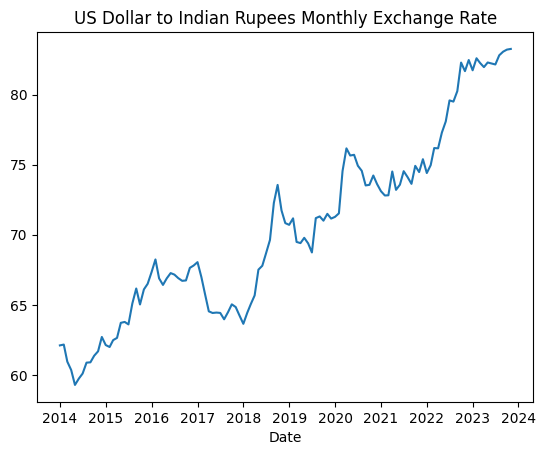

In [27]:
plot_variables(us_ind_df, "US Dollar to Indian Rupees Monthly Exchange Rate")

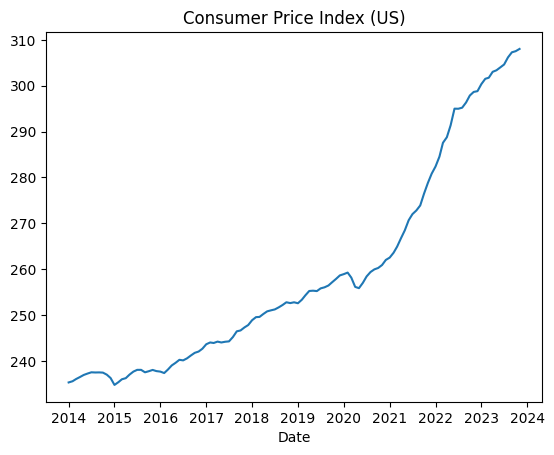

In [28]:
plot_variables(cpi_us_df, "Consumer Price Index (US)")

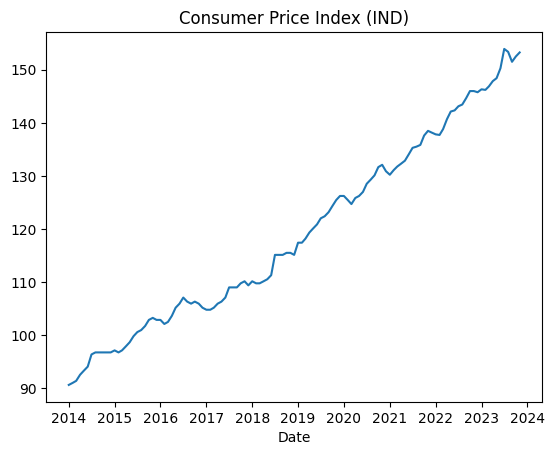

In [29]:
plot_variables(cpi_ind_df, "Consumer Price Index (IND)")

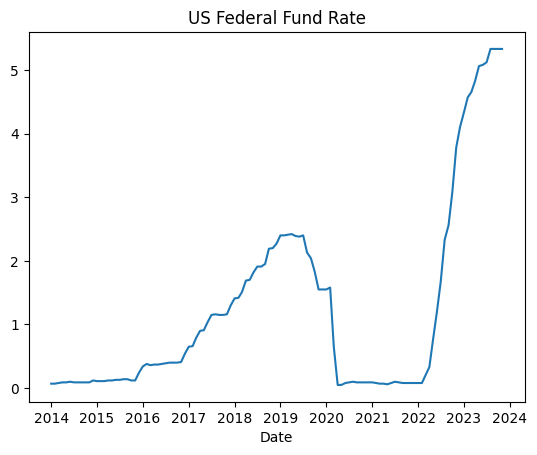

In [30]:
plot_variables(fund_rate_df,"US Federal Fund Rate")

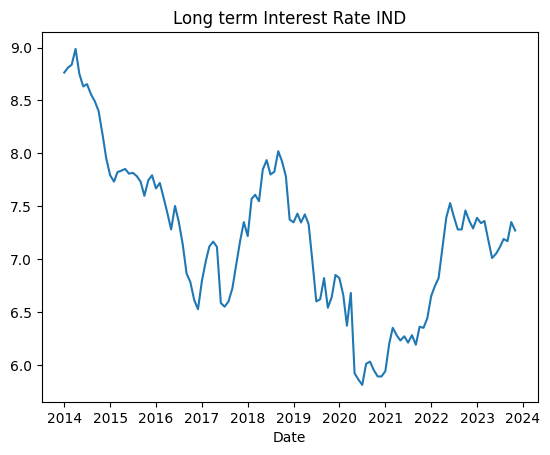

In [31]:
plot_variables(int_rate_ind_df, "Long term Interest Rate IND")

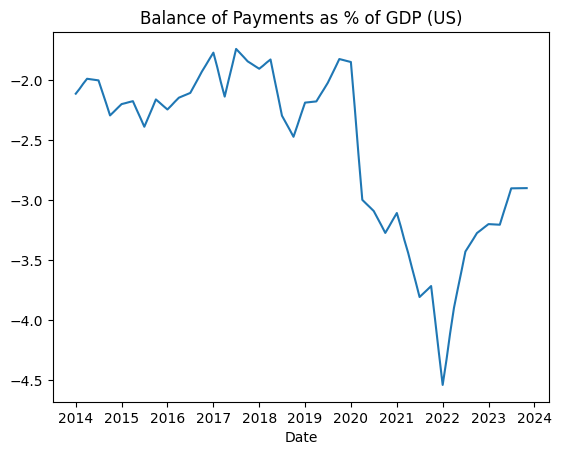

In [32]:
plot_variables(bop_us_mon_df, "Balance of Payments as % of GDP (US)")

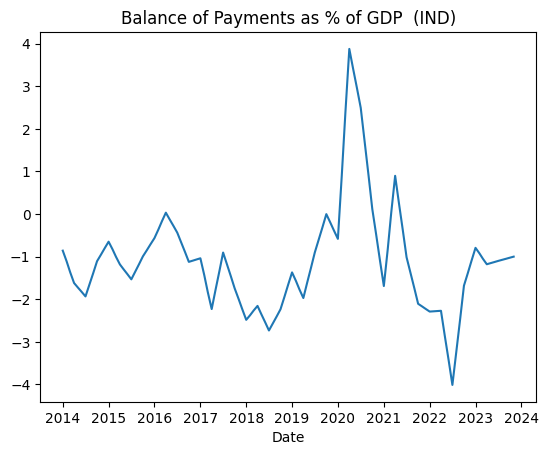

In [33]:
plot_variables(bop_ind_mon_df, "Balance of Payments as % of GDP  (IND)")

In [34]:
def first_difference(data):
    data_diff = data.diff().dropna()
    return data_diff

In [35]:
cpi_us_diff = first_difference(cpi_us_df)
cpi_ind_diff = first_difference(cpi_ind_df)
fund_rate_diff = first_difference(fund_rate_df)
int_rate_ind_diff = first_difference(int_rate_ind_df)
bop_us_diff = first_difference(bop_us_mon_df)
bop_ind_diff = first_difference(bop_ind_mon_df)

In [36]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

In [37]:
def acf_pacf_plots(data,title):
    fig, ax = plt.subplots()
    plot_acf(data, ax = ax,lags = 20, label = "Auto Correlation")
    plot_pacf(data, ax = ax,lags = 20, label = "Partial Auto Correlation")
    plt.title(title)
    plt.legend()
    plt.show()

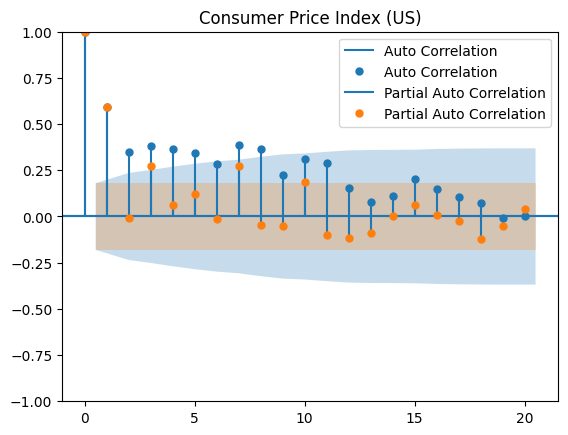

In [38]:
acf_pacf_plots(cpi_us_diff, "Consumer Price Index (US)")

Best `(p,q,d)`: `(3,0,2)`

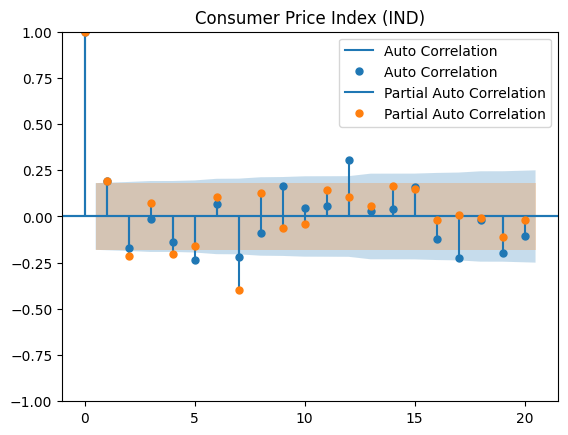

In [39]:
acf_pacf_plots(cpi_ind_diff, "Consumer Price Index (IND)")

Best `(p,q,d)`: `(2,0,5)`

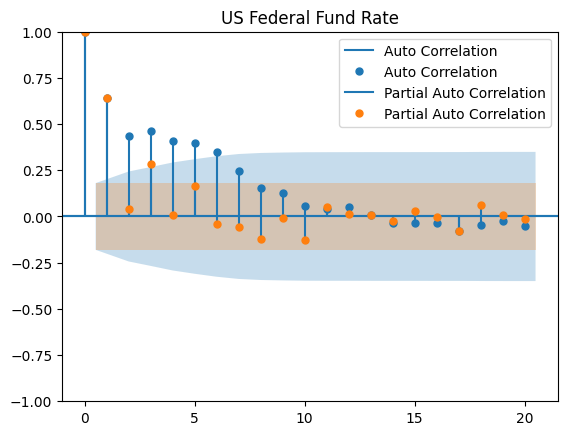

In [40]:
acf_pacf_plots(fund_rate_diff, "US Federal Fund Rate")

Best `(p,q,d)`: `(3,0,2)`

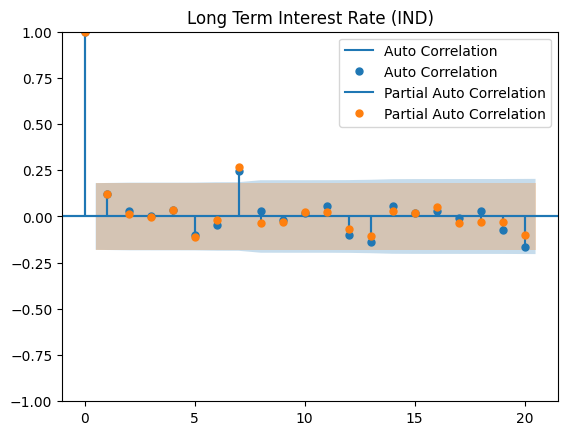

In [41]:
acf_pacf_plots(int_rate_ind_diff, "Long Term Interest Rate (IND)")

Best `(p,q,d)`: `(7,0,7)`

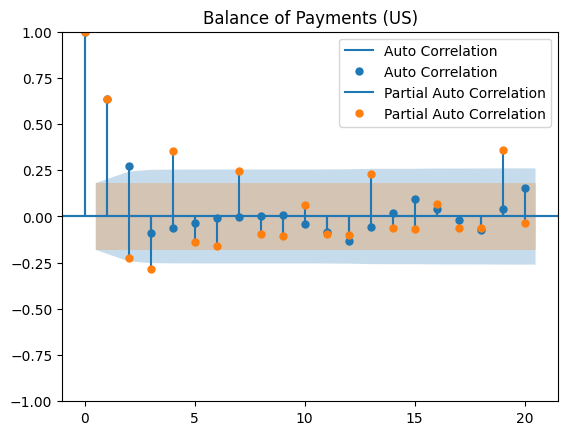

In [42]:
acf_pacf_plots(bop_us_diff, "Balance of Payments (US)")

Best `(p,q,d)`: `(2,0,2)`

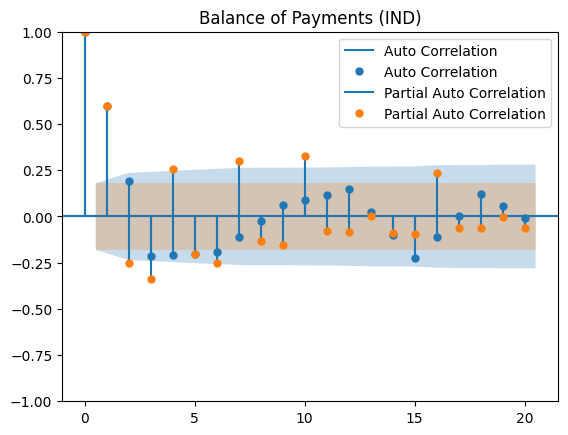

In [43]:
acf_pacf_plots(bop_ind_diff, "Balance of Payments (IND)")

Best `(p,q,d)`: `(2,0,1)`

### Forecasting the Exogenous Variables

In [44]:
from statsmodels.tsa.arima.model import ARIMA

In [45]:
def train_test(data):
    split_index = int(0.8*len(data))
    data_train = data.iloc[:split_index]
    data_test = data.iloc[split_index:]
    return data_train, data_test

In [46]:
def arima(data_train, data_test, params):
    start = len(data_train)
    end = len(data_train) + len(data_test) - 1
    arima_model = ARIMA(data_train, order = params)
    arima_fit = arima_model.fit()
    arima_predict = arima_fit.predict(start, end)
    arima_predict.index = data_test.index
    arima_pred_df = pd.DataFrame(arima_predict)
    return arima_pred_df

In [47]:
def pred_graphs(data_train, data_test, data_predict,title):
    plt.title(title)
    plt.plot(data_train, label='Train')
    plt.plot(data_test, label='Test')
    plt.plot(data_predict, label='Predictions')
    plt.xlabel('Date')
    plt.legend()
    plt.show()

In [48]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
def perf_metrics(data_test, data_pred, title):
    mae = mean_absolute_error(data_test, data_pred)
    mse = mean_squared_error(data_test, data_pred)
    rmse = np.sqrt(mean_squared_error(data_test, data_pred))
    perf = {'Variable':title,'MAE':mae,'MSE':mse,'RMSE':rmse}
    perf = pd.DataFrame([perf])
    perf.set_index('Variable')
    print(perf)

In [49]:
def forecast(data, title, params):
    forecast_index = pd.date_range(start = '2023-12-01', periods =10, freq = 'MS')
    arima_model = ARIMA(data, order = params)
    model_fit = arima_model.fit()
    model_forecast = model_fit.forecast(steps=10)
    #model_forecast = pd.DataFrame(model_forecast)
    model_forecast.index = forecast_index#.astype(str)
    plt.plot(data[:], label='Actual')
    plt.plot(model_forecast, label='ARMA Forecast')
    plt.title(title)
    plt.xlabel('Date')
    plt.legend()
    plt.tight_layout()
    plt.show()
    return model_forecast

In [50]:
cpi_us_train, cpi_us_test = train_test(cpi_us_diff)
cpi_ind_train, cpi_ind_test = train_test(cpi_ind_diff)
fund_rate_train, fund_rate_test = train_test(fund_rate_diff)
int_rate_ind_train, int_rate_ind_test = train_test(int_rate_ind_diff)
bop_us_train, bop_us_test = train_test(bop_us_diff)
bop_ind_train, bop_ind_test = train_test(bop_ind_diff)

The order for the parameters are adjusted with the best performace metrics

In [51]:
warnings.filterwarnings('ignore')

In [52]:
cpi_us_pred_df = arima(cpi_us_train, cpi_us_test, (3,0,2))
cpi_ind_pred_df = arima(cpi_ind_train, cpi_ind_test, (7,0,5))
fund_rate_pred_df = arima(fund_rate_train, fund_rate_test, (3,0,2))
int_rate_pred_df = arima(int_rate_ind_train, int_rate_ind_test,(7,0,7))
bop_us_pred_df = arima(bop_us_train, bop_us_test, (2,0,2))
bop_ind_pred_df = arima(bop_ind_train, bop_ind_test,(2,0,1))

In [53]:
perf_metrics(cpi_us_test, cpi_us_pred_df,"CPI (US)")
perf_metrics(cpi_ind_test, cpi_ind_pred_df,"CPI (IND)")
perf_metrics(fund_rate_test, fund_rate_pred_df,"Fund Rate")
perf_metrics(int_rate_ind_test, int_rate_pred_df,"Interest Rate")
perf_metrics(bop_us_test, bop_us_pred_df,"BOP (US)")
perf_metrics(bop_ind_test, bop_ind_pred_df,"BOP (IND)")

   Variable       MAE       MSE      RMSE
0  CPI (US)  0.636973  0.705324  0.839836
    Variable       MAE       MSE      RMSE
0  CPI (IND)  0.708965  0.969679  0.984723
    Variable       MAE       MSE      RMSE
0  Fund Rate  0.220319  0.093433  0.305668
        Variable      MAE       MSE      RMSE
0  Interest Rate  0.12683  0.023594  0.153603
   Variable      MAE       MSE     RMSE
0  BOP (US)  0.09258  0.014511  0.12046
    Variable      MAE      MSE      RMSE
0  BOP (IND)  0.25766  0.13424  0.366387


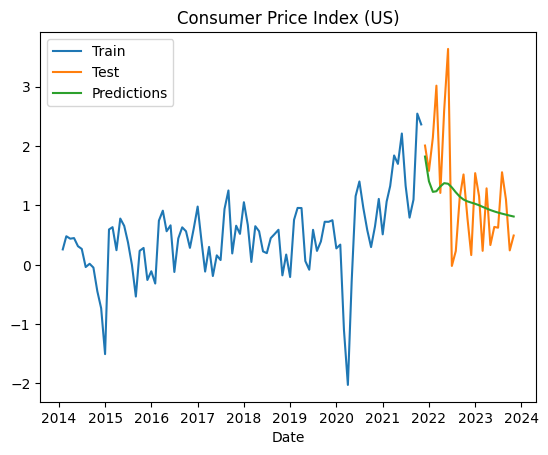

In [54]:
pred_graphs(cpi_us_train, cpi_us_test, cpi_us_pred_df,  "Consumer Price Index (US)")

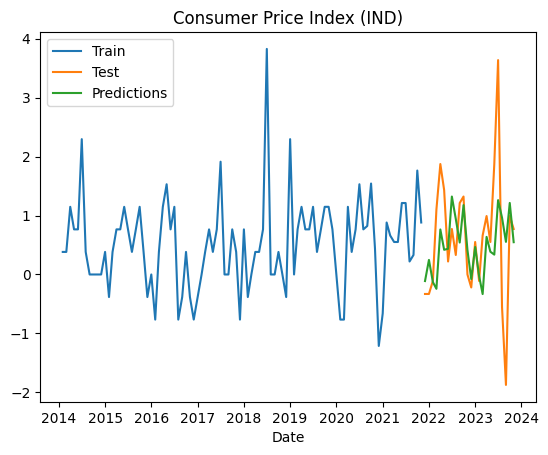

In [55]:
pred_graphs(cpi_ind_train, cpi_ind_test, cpi_ind_pred_df,  "Consumer Price Index (IND)")

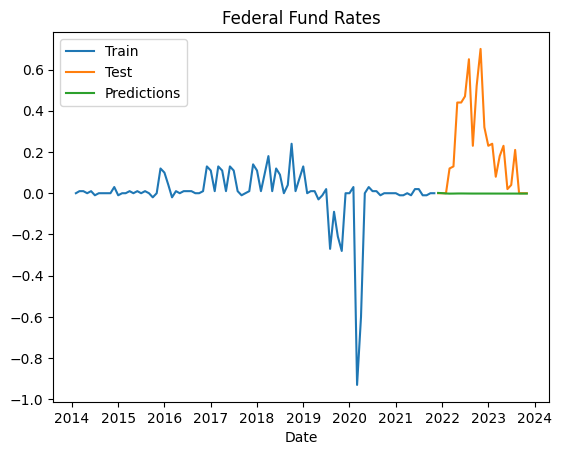

In [56]:
pred_graphs(fund_rate_train, fund_rate_test, fund_rate_pred_df,"Federal Fund Rates")

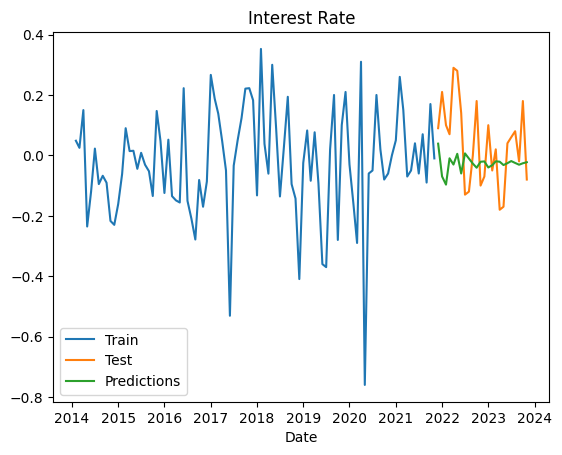

In [57]:
pred_graphs(int_rate_ind_train, int_rate_ind_test, int_rate_pred_df, "Interest Rate")

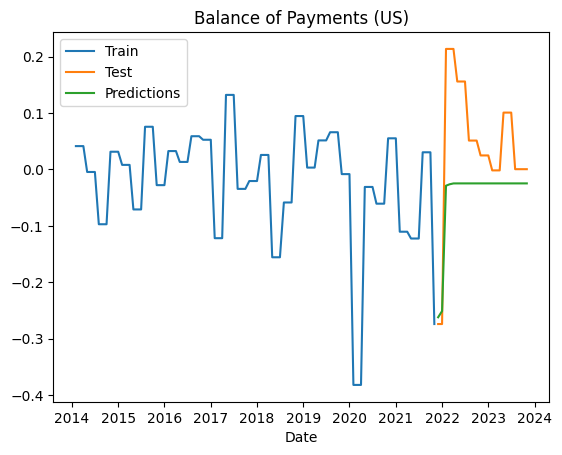

In [58]:
pred_graphs(bop_us_train, bop_us_test, bop_us_pred_df, "Balance of Payments (US)")

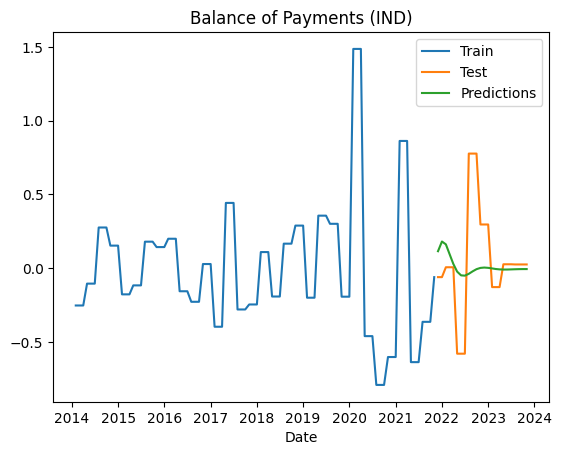

In [59]:
pred_graphs(bop_ind_train, bop_ind_test, bop_ind_pred_df, "Balance of Payments (IND)")

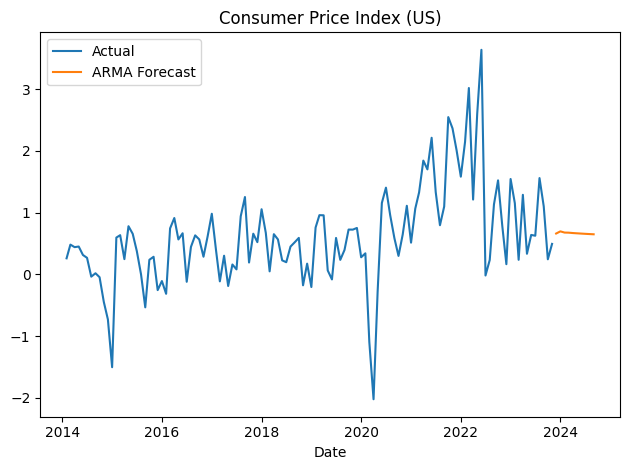

In [60]:
cpi_us_forecast = forecast(cpi_us_diff, "Consumer Price Index (US)", (3,0,2))

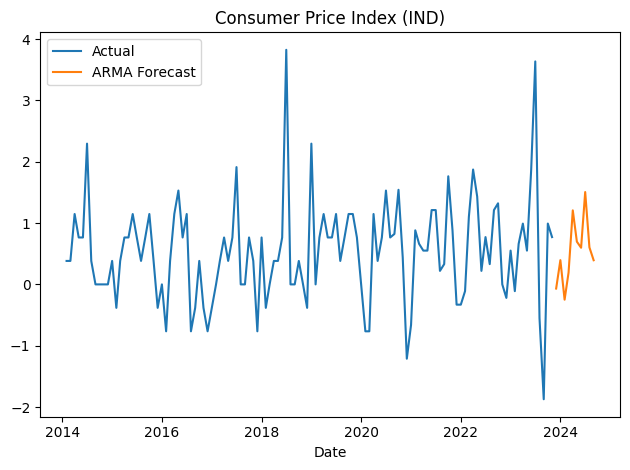

In [61]:
cpi_ind_forecast = forecast(cpi_ind_diff, "Consumer Price Index (IND)", (7,0,5))

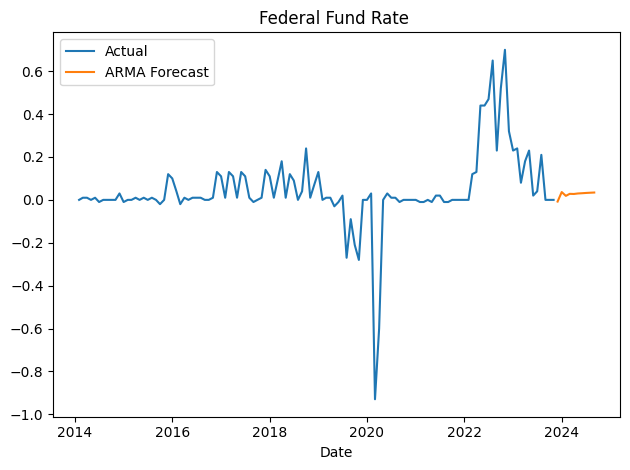

In [62]:
fund_rate_forecast = forecast(fund_rate_diff,"Federal Fund Rate ", (3,0,2))

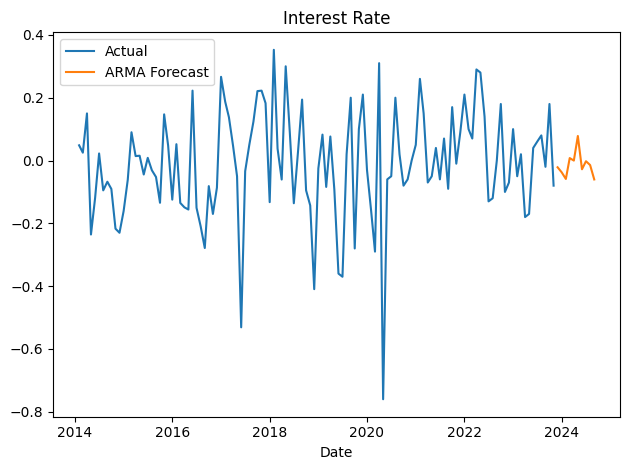

In [63]:
int_rate_forecast = forecast(int_rate_ind_diff, "Interest Rate",(7,0,7))

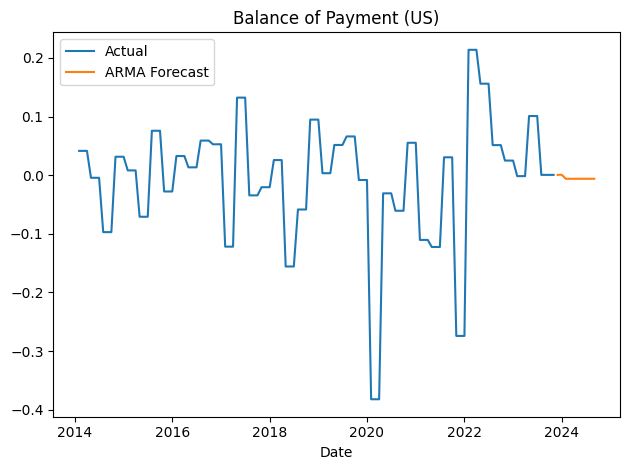

In [64]:
bop_us_forecast = forecast(bop_us_diff, "Balance of Payment (US)", (2,0,2))

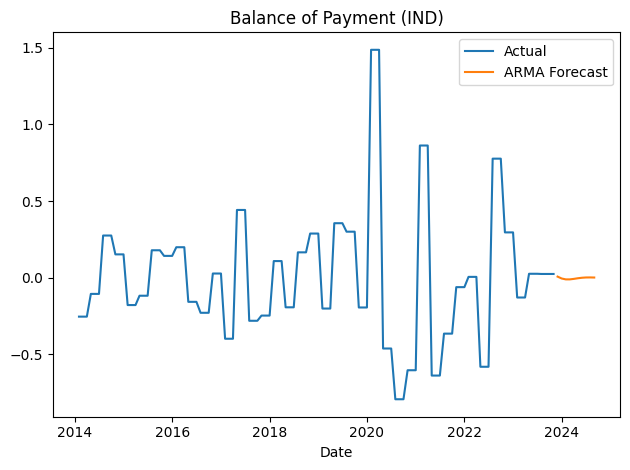

In [65]:
bop_ind_forecast = forecast(bop_ind_diff, "Balance of Payment (IND)",(2,0,1))

### SARIMAX model for Exchange Rate Forecasting

In [66]:
X = pd.concat([cpi_us_diff,cpi_ind_diff,fund_rate_diff,int_rate_ind_diff,bop_us_diff,bop_ind_diff], axis = 1)
X.set_index(cpi_us_diff.index)
y = us_ind_df.diff().dropna()
y

,exchange_rate
2014-02-01,0.0585
2014-03-01,-1.2166
2014-04-01,-0.6012
2014-05-01,-1.0621
2014-06-01,0.4524
...,...
2023-07-01,-0.0687
2023-08-01,0.6557
2023-09-01,0.2578
2023-10-01,0.1462


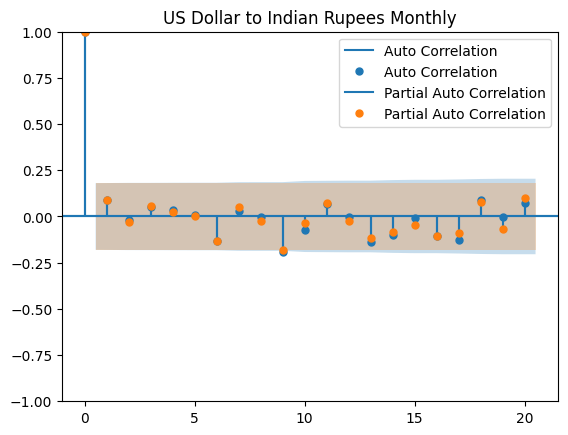

In [67]:
acf_pacf_plots(y,"US Dollar to Indian Rupees Monthly")

Best `(p,q,d)` are `(9,0,9)`

In [68]:
split_index = int(0.9*len(X))
X_train = X[:split_index]
y_train = y[:split_index]
X_test = X[split_index:]
y_test = y[split_index:]

In [69]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [70]:
start = len(X_train)
end = len(X_train) + len(X_test) -1

In [71]:
sarimax = SARIMAX(y_train, exog = X_train, order=(9,0,9))
sarimax_fit = sarimax.fit(disp=0)
sarimax_predict = sarimax_fit.predict(start, end, exog = X_test)
sarimax_predict.index = X_test.index

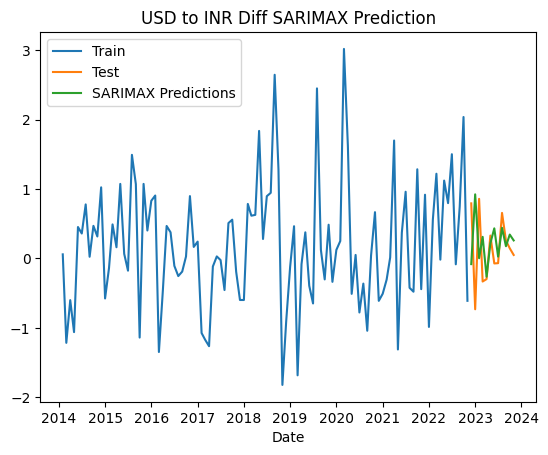

In [72]:
plt.plot(y_train, label='Train')
plt.plot(y_test, label='Test')
plt.plot(sarimax_predict, label='SARIMAX Predictions')
plt.title('USD to INR Diff SARIMAX Prediction')
plt.xlabel('Date')
plt.legend()
plt.show()

In [73]:
perf_metrics(y_test,sarimax_predict,"USD to INR")

     Variable       MAE       MSE     RMSE
0  USD to INR  0.456647  0.422422  0.64994


In [74]:
X_forecast = pd.concat([cpi_us_forecast,cpi_ind_forecast,fund_rate_forecast,int_rate_forecast,bop_us_forecast,bop_ind_forecast], axis =1)
X_forecast.index = cpi_us_forecast.index
X_forecast

,predicted_mean,predicted_mean,predicted_mean,predicted_mean,predicted_mean,predicted_mean
2023-12-01,0.660675,-0.067922,-0.007872,-0.021462,0.000538,0.007738
2024-01-01,0.695662,0.395461,0.036403,-0.037690,0.000623,-0.004690
2024-02-01,0.676189,-0.249205,0.018734,-0.058694,-0.006248,-0.010369
2024-03-01,0.674603,0.191739,0.028138,0.007771,-0.006187,-0.010355
2024-04-01,0.668713,1.207099,0.027507,-0.000134,-0.006139,-0.007073
2024-05-01,0.664330,0.696689,0.029833,0.078114,-0.006140,-0.002962
2024-06-01,0.659932,0.597599,0.030993,-0.027835,-0.006141,0.000313
2024-07-01,0.655885,1.505980,0.032274,-0.002196,-0.006141,0.002061
2024-08-01,0.652074,0.603907,0.033324,-0.014406,-0.006141,0.002373
2024-09-01,0.648508,0.393815,0.034268,-0.060252,-0.006141,0.001760


In [75]:
sarimax_model = SARIMAX(y,order = (9,0,9))
sarimax_model_fit = sarimax_model.fit(disp = 0)
sarimax_forecast = sarimax_model_fit.forecast(steps =10, exog = X_forecast)
sarimax_forecast.index = X_forecast.index

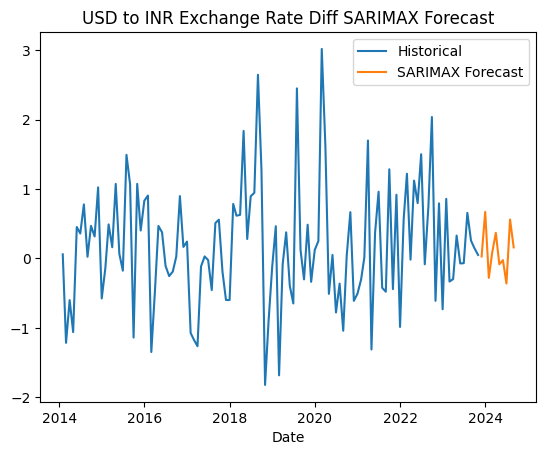

In [76]:
plt.plot(y, label='Historical')
plt.plot(sarimax_forecast, label='SARIMAX Forecast')
plt.title('USD to INR Exchange Rate Diff SARIMAX Forecast')
plt.xlabel('Date')
plt.legend()
plt.show()

In [77]:
sarimax_forecast

2023-12-01    0.028163
2024-01-01    0.670257
2024-02-01   -0.280568
2024-03-01    0.085633
2024-04-01    0.368369
2024-05-01   -0.084467
2024-06-01   -0.025318
2024-07-01   -0.361796
2024-08-01    0.560350
2024-09-01    0.158625
Freq: MS, Name: predicted_mean, dtype: float64

### Converting the difference to Exchange Rate

In [78]:
xchange_rate = us_ind_df['exchange_rate'].iloc[-1] + sarimax_forecast.cumsum()
sarimax_ind_forecasts = pd.concat([us_ind_df['exchange_rate'], xchange_rate], axis = 0)
sarimax_ind_forecasts.to_csv('data/sarimax_ind_forecasts.csv')

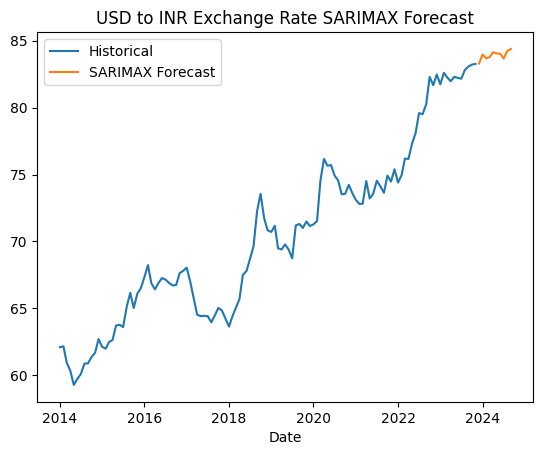

In [79]:
plt.plot(us_ind_df, label='Historical')
plt.plot(xchange_rate, label='SARIMAX Forecast')
plt.title('USD to INR Exchange Rate SARIMAX Forecast')
plt.xlabel('Date')
plt.legend()
plt.show()

#### Interpretation

Exchange rate forecasts indicate that the value of the US Dollars (USD) is expected to rise against the Indian Rupees (INR) over the next 10 months. It suggests a general upward trend with occasional minor fluctuations.

|Model|  ARIMA| | | |SARIMA |  || | SARIMAX| | |
|--|---|---|---|---|---|---|---|--|--|--|--|
|Metric|	MAE	|MSE	|RMSE| |MAE|	MSE	| RMSE|	|MAE|	MSE	|RMSE|
|Indian Rupees	|0.561540|	0.470815	|0.686160|	|0.650252|	0.572051	|0.756340| | 0.456647 | 0.422422|  <b>0.64994</b>|

## Findings

Throughout the Time-series analysis and forecasting, we found the following observations -

1. **USD/Euro data**

    |ARIMA| SARIMA|
    |--|--|
    |The model forecasted that the USD will gain more value as compared to Euro in the coming 10 months|The model forecasted that the USD will gain more value as compared to Euro in the coming 10 months|
    |Forecasts December 2023, January, February, and March 2024 accurately! |The forecasting is not as accurate as ARIMA although the trend is accurately captured.|
    
    ![USD/Euro](img/Euro.png)
    
    
    
2. **USD/GBP data**

    |ARIMA| SARIMA|
    |--|--|
    |The model forecasted that the USD will achieve a steady rise against UK in the coming 10 months|The model forecasted that the USD will gain more value as compared to GBP in the coming 10 months, although not consistent|
    |Fails to capture the trend for rates in December 2023, January, february, and March 2024! |The forecasting is not as accurate as the trend is not captured accurately.|
    
    ![alt](img/uk.png)



3. **USD/INR data**

    |ARIMA| SARIMA|SARIMAX|
    |--|--|--|
    |The model shows that the USD currency value tends to remain steady as compared to INR over the next 10 months |The model forecasted that the USD will gain a steep rise against INR in the coming 10 months with June 2024 at the peak|The model forecasts a slight increase in USD value against INR over the 10 months with fluctuations throughout the months
    |Fails to capture the trend over the months! |Shows a steady rise in USD value failing to capture the trend|The forecasting is better than ARIMA and SARIMA, however, January 2024 forecasting is misleading|
    
    ![alt](img/ind.png)
    
    


4. **USD/JPY data**

    |ARIMA| SARIMA|
    |--|--|
    |The model forecasted that the USD will remain steady against JPY until June 2024 and then starts to rise|The model forecasted that the USD will climb up in value against JPY in the coming 10 months with July 2024 at the peak|
    |Fails to capture the trend and shows a steady rate! |Shows a upward trend as opposed to the actual fluctating trend, misses the dip in December 2023|
    
    ![alt](img/jpn.png)
    
    
    
    
5. **USD/CHY data**

    |ARIMA| SARIMA|
    |--|--|
    |The model forecasted that the USD will drop in value as compared to CHY in the coming 10 months|The model forecasted that the USD will drop in value as compared to CHY in the coming 10 months, i.e, CHY strenghtens over this period|
    |Fails to capture the trend and shows a steady rate from december 2023! |The trend is captured correctly, however, misses the rise of rate in December 2023|
    
    ![alt](img/chn.png)

## Performance Metrics

|ARIMA| | | |SARIMA | | ||
|--|---|---|---|---|---|---|---|
|Currency|	MAE	|MSE	|RMSE	|Currency	|MAE|	MSE	|RMSE|
|Euro	|0.012929	|0.000251|	<b>0.015857</b>	|Euro|	0.014350|	0.000278	|0.016687|
|UK Pound	|0.013713	|0.000249|	0.015792	|UK Pound|	0.014054|	0.000251|	<b>0.015840</b>|
|Indian Rupees	|0.561540|	0.470815	|<b>0.686160</b>|	Indian Rupees	|0.650252|	0.572051	|0.756340|
|Japanese Yen	|2.547739	|10.217898	|<b>3.196545</b>|	Japanese Yen	|2.834048	|11.263803|	3.356159|
|Chinese Yuan	|0.001559|	0.000004	|0.002056|	Chinese Yuan	|0.001310	|0.000003	|<b>0.001841</b>|

## Insights

- Among all the currencies, the Chinese Yuan tends to be in the strengthening phase against US Dollars. 
- The strengthening phase of Chinese Yuan will be a good opportunity for investing in U.S. exporting companies dealing with Chinese Exports as they can sell the goods at a lower price in China.
- The Chinese buyers can get more goods from the US Exporters for the same Chinese Yuan during the Weak Dollar phase.
- The US can attract more tourists from China during the weak dollar phase and it can be a boon for the tourism industry in US.
- For the other countries and EU, it's a strong dollar period and they would gain from exporting goods to US.
- A US Investor investing in Chinese company will gain; A US investor investing in India, UK or EU will suffer loss!

## Conclusion

The foreign exchange rate between two countries determine the trade relations and investment strategies between the traders and investors in these countries.

When a weak dollar uplifts the investment, exporting and tourism industry in the US, it affects imports and domestic population by inflation.

## References

1. <a href = "https://www.fisdom.com/factors-affecting-rupee-dollar-exchange-rate/">Factors Affecting Rupee Dollar Exchange Rate</a>
2. <a href = "https://www.investopedia.com/articles/forex/08/weak-usd.asp#:~:text=A%20weaker%20dollar%2C%20however%2C%20can,investing%20in%20U.S.%20exporting%20companies.">Weak Dollar Impacts</a>
3. <a href = "https://courses.lumenlearning.com/wm-macroeconomics/chapter/strengthening-and-weakening-currency/">Strengthening and Weakening Currencies</a>
4. <a href = "https://medium.com/@dagorhan20/usd-try-next-30-days-with-sarimax-a11bbb4a7a00">SARIMAX Forecasting USD/TRY</a>
5. <a href = "https://www.analyticsvidhya.com/blog/2023/06/sarima-model-for-forecasting-currency-exchange-rates/"> SARIMA Forecasting of Foreign Exchange Rates</a>


## Data Sources

1. Organization for Economic Co-operation and Development, Balance of Payments BPM6: Current Account Balance: Total Balance as Percent of GDP for United States [USAB6BLTT02STSAQ], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/USAB6BLTT02STSAQ, March 27, 2024.

2. Organization for Economic Co-operation and Development, Consumer Price Index: All Items: Total for India [INDCPIALLMINMEI], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/INDCPIALLMINMEI, March 27, 2024

3. Organization for Economic Co-operation and Development, Interest Rates: Long-Term Government Bond Yields: 10-Year: Main (Including Benchmark) for India [INDIRLTLT01STM], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/INDIRLTLT01STM, March 31, 2024

4. Organization for Economic Co-operation and Development, Balance of Payments BPM6: Current Account Balance: Total Balance as Percent of GDP for India [INDB6BLTT02STSAQ], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/INDB6BLTT02STSAQ, April 5, 2024

5. U.S. Bureau of Labor Statistics, Consumer Price Index for All Urban Consumers: All Items in U.S. City Average [CPIAUCSL], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/CPIAUCSL, March 27, 2024

6. Board of Governors of the Federal Reserve System (US), Federal Funds Effective Rate [FEDFUNDS], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/FEDFUNDS, April 1, 2024

7. Board of Governors of the Federal Reserve System (US), Indian Rupees to U.S. Dollar Spot Exchange Rate [EXINUS], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/EXINUS, April 2, 2024
